# Sequential Quadratic Programming

(which is just using Newton on a Lagrangian)

In [2]:
import numpy as np
import numpy.linalg as la

Here's an objective function $f$ and a constraint $g(x)=0$:

In [3]:
def f(vec):
    x = vec[0]
    y = vec[1]
    return (x-2)**4 + 2*(y-1)**2

def g(vec):
    x = vec[0]
    y = vec[1]
    return x + 4*y - 3

Now define the Lagrangian, its gradient, and its Hessian:

In [4]:

def L(vec):
    lam = vec[2]
    return f(vec) + lam * g(vec)

def grad_L(vec):
    x = vec[0]
    y = vec[1]
    lam = vec[2]
    
    return np.array([
        4*(x-2)**3 + lam,
        4*(y-1) + 4*lam,
        x+4*y-3
        ])

def hess_L(vec):
    x = vec[0]
    y = vec[1]
    lam = vec[2]
    
    return np.array([
        [12*(x-2)**2, 0, 1],
        [0, 4, 4],
        [1, 4, 0]
        ])    

At this point, we only need to find an *unconstrained* minimum of the Lagrangian!

Let's fix a starting vector `vec`:

In [5]:
#clear
vec = np.zeros(3)

Implement Newton and run this cell in place a number of times (Ctrl-Enter):

In [18]:
#clear
vec = vec - la.solve(hess_L(vec), grad_L(vec))
vec

array([ 1.46398989,  0.38400253,  0.61599747])

Let's first check that we satisfy the constraint:

In [21]:
#clear
g(vec)

0.0

Next, let's look at a plot:

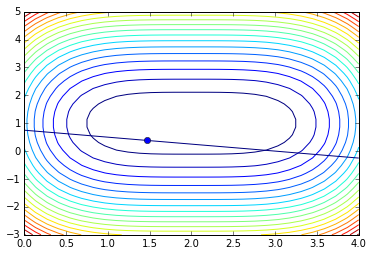

In [22]:
import matplotlib.pyplot as pt
x, y = np.mgrid[0:4:30j, -3:5:30j]
pt.contour(x, y, f(np.array([x,y])), 20)
pt.contour(x, y, g(np.array([x,y])), levels=[0])
pt.plot(vec[0], vec[1], "o")